In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/jobcsv/job.csv


In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
# Reading the CSV file with help of pandas
df = pd.read_csv('/kaggle/input/jobcsv/job.csv')

In [4]:
# Observering the CSV file 
df.head(15)

,Unnamed: 0,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
0,0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,UK,White
1,1,28.0,Female,Master's,Data Analyst,3.0,65000.0,USA,Hispanic
2,2,45.0,Male,PhD,Senior Manager,15.0,150000.0,Canada,White
3,3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,USA,Hispanic
4,4,52.0,Male,Master's,Director,20.0,200000.0,USA,Asian
5,5,29.0,Male,Bachelor's,Marketing Analyst,2.0,55000.0,USA,Hispanic
6,6,42.0,Female,Master's,Product Manager,12.0,120000.0,USA,Asian
7,7,31.0,Male,Bachelor's,Sales Manager,4.0,80000.0,China,Korean
8,8,26.0,Female,Bachelor's,Marketing Coordinator,1.0,45000.0,China,Chinese
9,9,38.0,Male,PhD,Senior Scientist,10.0,110000.0,Australia,Australian


In [5]:
# info() functions shows us the columns and its null values 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           6704 non-null   int64  
 1   Age                  6702 non-null   float64
 2   Gender               6702 non-null   object 
 3   Education Level      6701 non-null   object 
 4   Job Title            6702 non-null   object 
 5   Years of Experience  6701 non-null   float64
 6   Salary               6699 non-null   float64
 7   Country              6704 non-null   object 
 8   Race                 6704 non-null   object 
dtypes: float64(3), int64(1), object(5)
memory usage: 471.5+ KB


## Observation  1
* We see their is some amount of null values are present in the columns 
* In data type their is the mismatched data types are present in that (e.g age is in float but it should be in int )
* Their is column name called 'Unnamed: 0' we would drop it. Their is no use of that column 


In [6]:
# We drop all the null values 
df.dropna(inplace=True)

In [7]:
# Here we can see the all columns has same numbers if rows 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6698 entries, 0 to 6703
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           6698 non-null   int64  
 1   Age                  6698 non-null   float64
 2   Gender               6698 non-null   object 
 3   Education Level      6698 non-null   object 
 4   Job Title            6698 non-null   object 
 5   Years of Experience  6698 non-null   float64
 6   Salary               6698 non-null   float64
 7   Country              6698 non-null   object 
 8   Race                 6698 non-null   object 
dtypes: float64(3), int64(1), object(5)
memory usage: 523.3+ KB


In [8]:
# Chnging the data type for indiviual column

df['Age']=df['Age'].astype(int)
df['Gender']=df['Gender'].astype('category')
df['Years of Experience']=df['Years of Experience'].astype('int')
df['Education Level']=df['Education Level'].astype('category')
df['Salary']=df['Salary'].astype('int')
df['Race']=df['Race'].astype('category')

In [9]:
#Droping the 'Unnamed: 0' column. Because I don't think its importent for furhter analysis

df.drop(['Unnamed: 0'],axis=1, inplace=True)

In [10]:
#see the column is gone 

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6698 entries, 0 to 6703
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Age                  6698 non-null   int64   
 1   Gender               6698 non-null   category
 2   Education Level      6698 non-null   category
 3   Job Title            6698 non-null   object  
 4   Years of Experience  6698 non-null   int64   
 5   Salary               6698 non-null   int64   
 6   Country              6698 non-null   object  
 7   Race                 6698 non-null   category
dtypes: category(3), int64(3), object(2)
memory usage: 334.4+ KB


In [11]:
# Observe in mathamatical perspective

df.describe()

,Age,Years of Experience,Salary
count,6698.000000,6698.000000,6698.000000
mean,33.623022,8.094207,115329.253061
std,7.615784,6.061399,52789.792507
min,21.000000,0.000000,350.000000
25%,28.000000,3.000000,70000.000000
50%,32.000000,7.000000,115000.000000
75%,38.000000,12.000000,160000.000000
max,62.000000,34.000000,250000.000000


- In describe() function we see minimum age for job is 21 and maximum 62 
- Same as for Years of Experience 25% of is for 3 years maximum is 34 years

In [12]:
df.head(15)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
0,32,Male,Bachelor's,Software Engineer,5,90000,UK,White
1,28,Female,Master's,Data Analyst,3,65000,USA,Hispanic
2,45,Male,PhD,Senior Manager,15,150000,Canada,White
3,36,Female,Bachelor's,Sales Associate,7,60000,USA,Hispanic
4,52,Male,Master's,Director,20,200000,USA,Asian
5,29,Male,Bachelor's,Marketing Analyst,2,55000,USA,Hispanic
6,42,Female,Master's,Product Manager,12,120000,USA,Asian
7,31,Male,Bachelor's,Sales Manager,4,80000,China,Korean
8,26,Female,Bachelor's,Marketing Coordinator,1,45000,China,Chinese
9,38,Male,PhD,Senior Scientist,10,110000,Australia,Australian


## Now we are going to do heatmap representation

<Axes: >

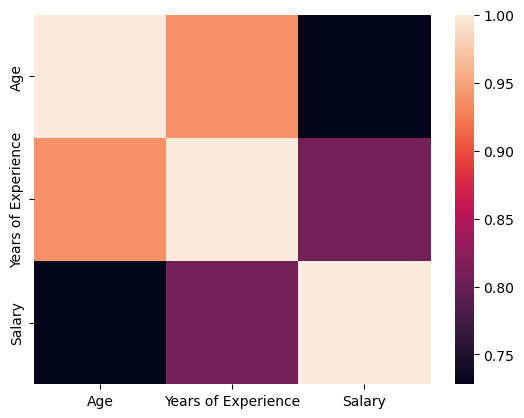

In [13]:
sns.heatmap(df.corr())

- We should do one think is we hold one indiviual column   analyse it with the calm and piatence see what the out we get. 
- One thing from this we decide our target column and we will work on that coulmn
- We will do an univariate analysis and visit indiviual column 


## * Univarient Analysis  

(array([ 661., 1782., 1562.,  946.,  528.,  604.,  338.,  154.,  104.,
          19.]),
 array([21. , 25.1, 29.2, 33.3, 37.4, 41.5, 45.6, 49.7, 53.8, 57.9, 62. ]),
 <BarContainer object of 10 artists>)

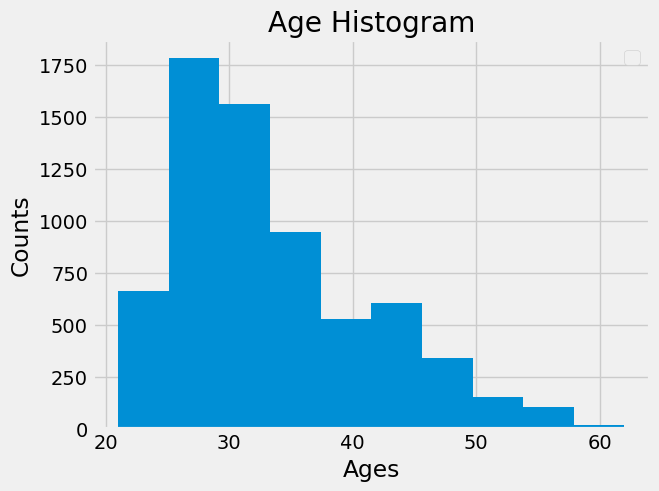

In [14]:
plt.style.use('fivethirtyeight')
plt.title('Age Histogram')
plt.xlabel('Ages')
plt.ylabel('Counts')
plt.legend()
plt.hist(df['Age'])

Text(0.5, 1.0, 'Years of Experience Hist')

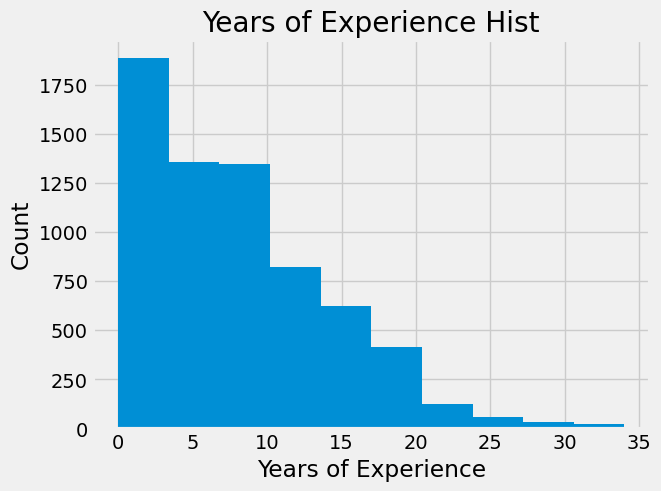

In [15]:
plt.style.use('fivethirtyeight')
plt.xlabel('Years of Experience')
plt.ylabel('Count')
plt.hist(df['Years of Experience'])
plt.title('Years of Experience Hist')

(array([ 137.,  734., 1141.,  916.,  854.,  943.,  757., 1102.,  102.,
          12.]),
 array([   350.,  25315.,  50280.,  75245., 100210., 125175., 150140.,
        175105., 200070., 225035., 250000.]),
 <BarContainer object of 10 artists>)

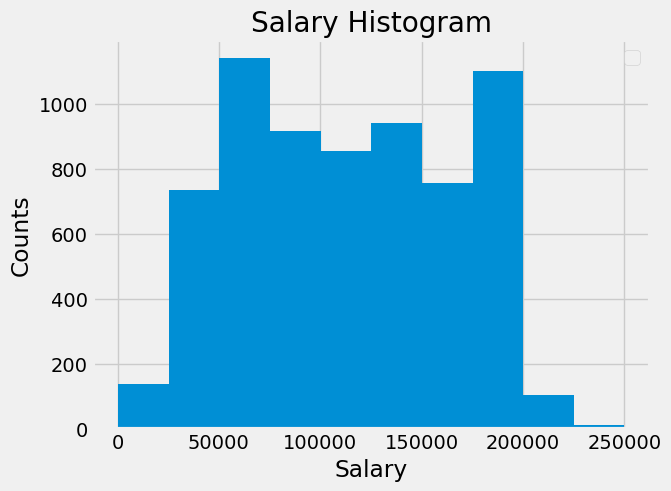

In [16]:
plt.style.use('fivethirtyeight')
plt.title('Salary Histogram')
plt.xlabel('Salary')
plt.ylabel('Counts')
plt.legend()
plt.hist(df['Salary'])

Text(0, 0.5, 'Count')

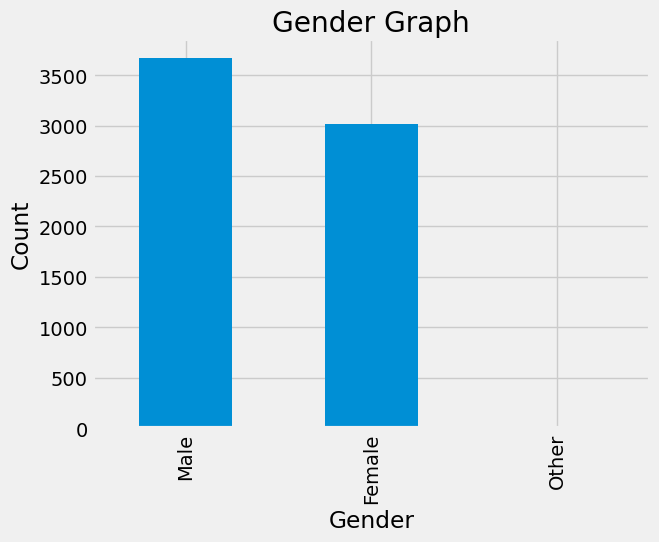

In [17]:
plt.style.use('fivethirtyeight')
df['Gender'].value_counts().plot(kind='bar')
plt.title('Gender Graph')
plt.xlabel('Gender')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

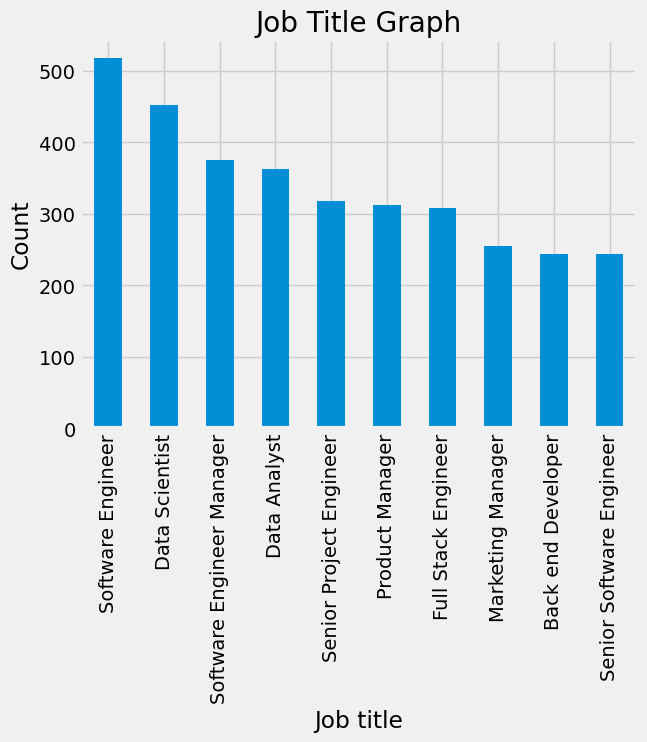

In [18]:
plt.style.use('fivethirtyeight')
df['Job Title'].value_counts().head(10).plot(kind='bar')
plt.title('Job Title Graph')
plt.xlabel('Job title')
plt.ylabel('Count')

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, "Bachelor's"),
  Text(1, 0, "Bachelor's Degree"),
  Text(2, 0, 'High School'),
  Text(3, 0, "Master's"),
  Text(4, 0, "Master's Degree"),
  Text(5, 0, 'PhD'),
  Text(6, 0, 'phD')])

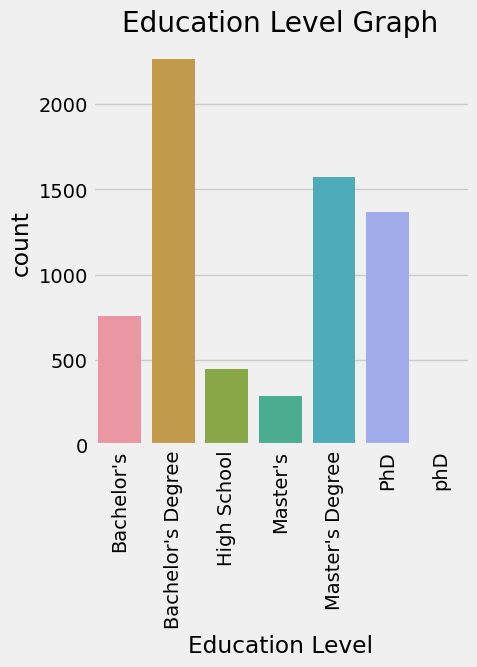

In [19]:
plt.style.use('fivethirtyeight')
sns.catplot(x='Education Level', kind='count', data=df)
plt.title('Education Level Graph')
plt.xticks(rotation=90)

## Observation 2 
- In that the highest number of ages in between 25 to 29
- Most of the employees are fresher in the companies as well as they prefreed to hire fresher
- The number of salary get in between 50k to 75k 
- Obvious, most of have bachors degree because of fresher
- Most demandable jobs are Software Engineer, Data Scientist, so far and so forth


## * Multivariate Analysis

Text(0.5, 1.0, 'Gender vs Age')

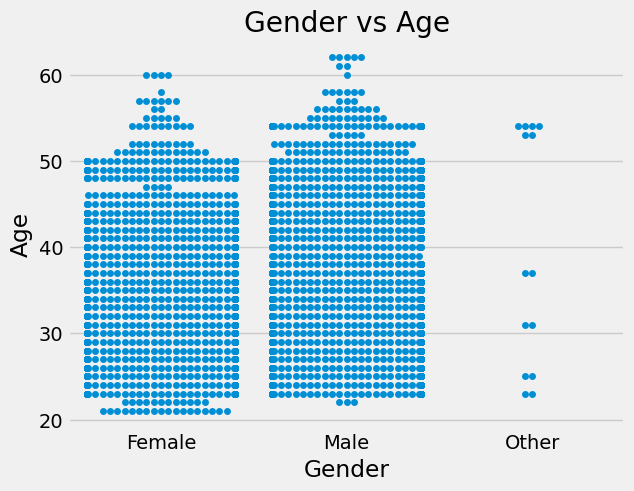

In [20]:
# Age and Gender
plt.style.use('fivethirtyeight')
sns.swarmplot(x=df['Gender'], y=df['Age'], data=df)
plt.title('Gender vs Age')

Text(0.5, 1.0, 'Gender vs Salary')

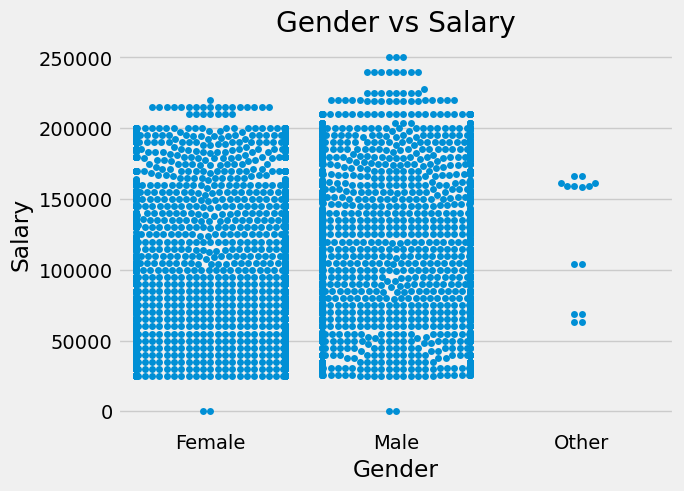

In [21]:
# Salary and gender
plt.style.use('fivethirtyeight')
sns.swarmplot(x=df['Gender'], y=df['Salary'], data=df)
plt.title('Gender vs Salary')

Text(0.5, 1.0, 'Age vs Salary')

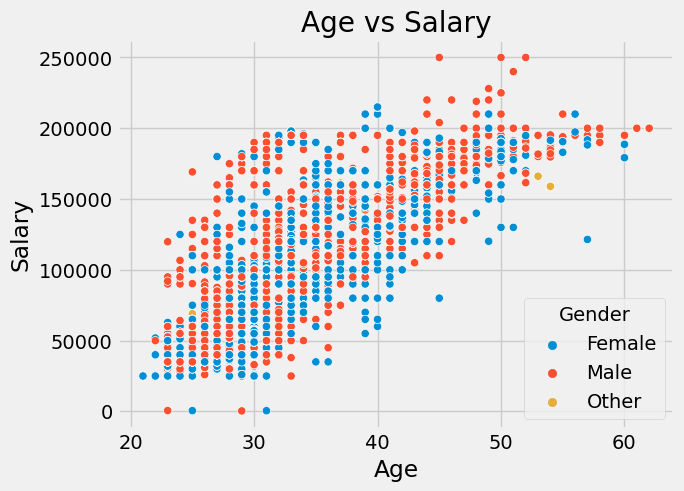

In [22]:
# Salary vs Age vs Gender
plt.style.use('fivethirtyeight')
sns.scatterplot(x=df['Age'], y=df['Salary'], hue=df['Gender'])
plt.title('Age vs Salary')

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, "Bachelor's"),
  Text(1, 0, "Bachelor's Degree"),
  Text(2, 0, 'High School'),
  Text(3, 0, "Master's"),
  Text(4, 0, "Master's Degree"),
  Text(5, 0, 'PhD'),
  Text(6, 0, 'phD')])

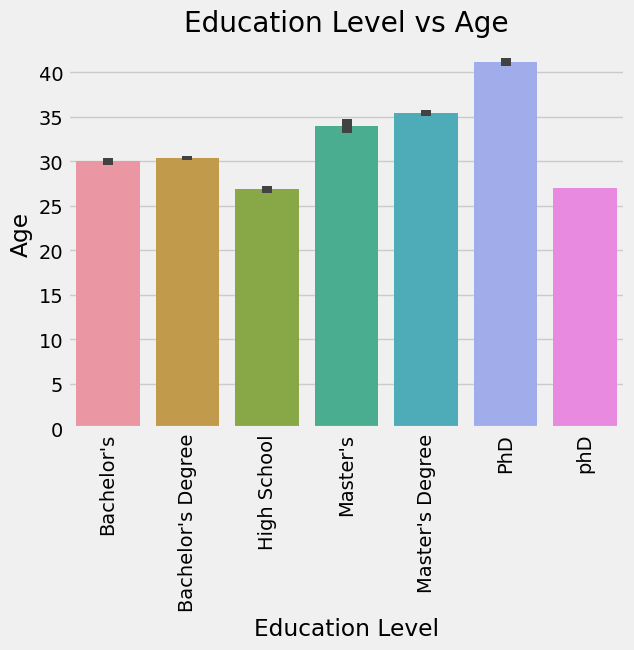

In [23]:
# Education vs Age 
plt.style.use('fivethirtyeight')
sns.barplot(x=df['Education Level'], y=df['Age'])
plt.title('Education Level vs Age')
plt.xticks(rotation=90)

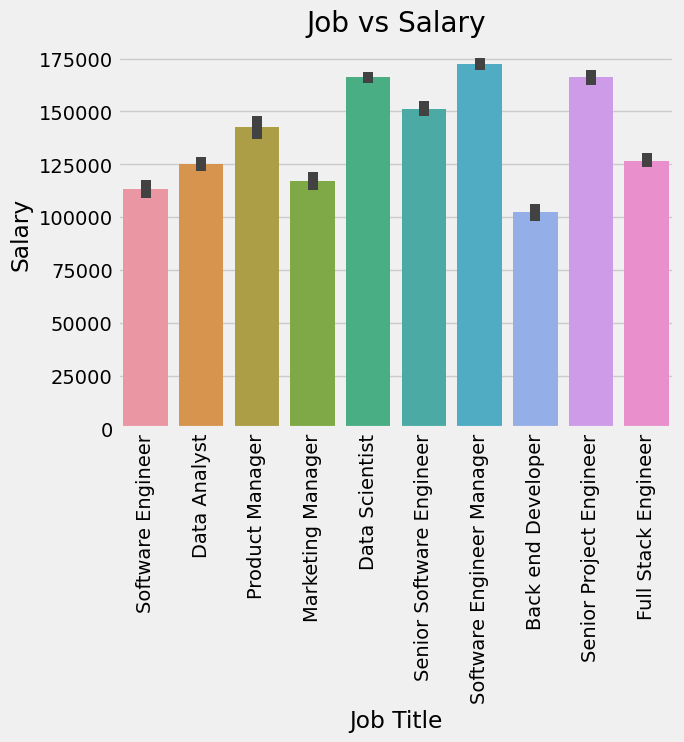

In [24]:
#Job title vs Salary 
plt.style.use('fivethirtyeight')
top_10_jobs = df['Job Title'].value_counts().head(10).index
a = df[df['Job Title'].isin(top_10_jobs)] # We store all the index of job title in a variable
sns.barplot(x='Job Title', y='Salary', data=a)
plt.xticks(rotation=90)
plt.title('Job vs Salary')
plt.show()

Text(0.5, 1.0, 'Years of Experience vs Salary')

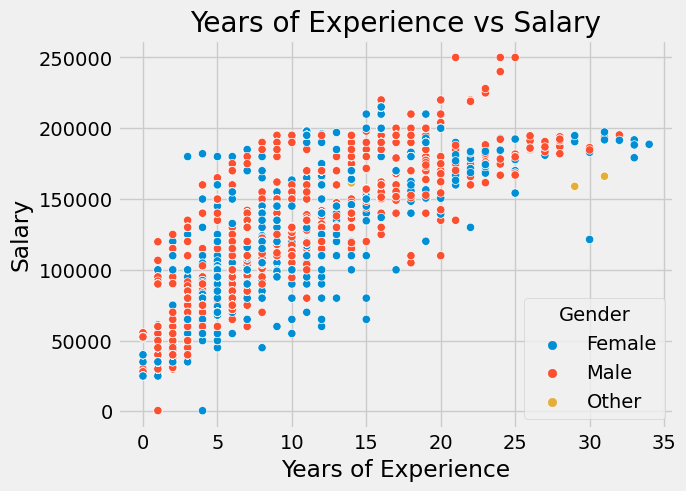

In [25]:
# Years of Experience vs Salary vs Gender
sns.scatterplot(x = df['Years of Experience'], y = df['Salary'],
               hue = df['Gender'])
plt.title('Years of Experience vs Salary')

Text(0.5, 1.0, 'Education Level vs Years of Experience')

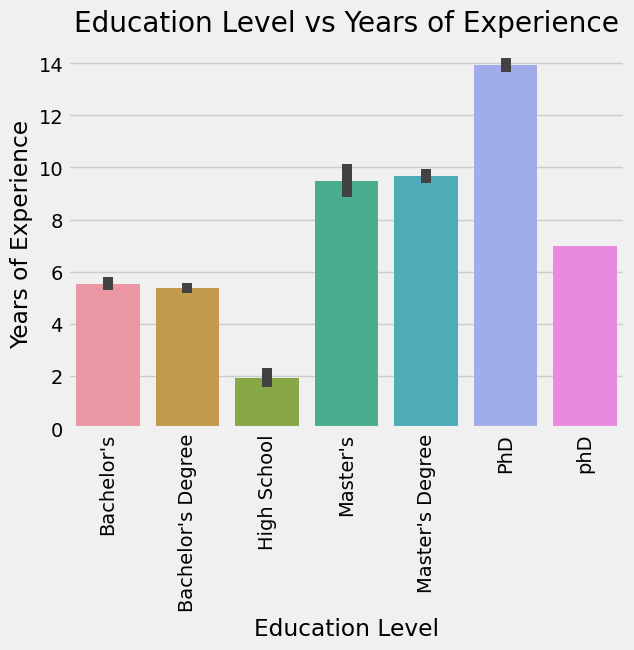

In [26]:
# Education Level vs Years of Experience
sns.barplot(x=df['Education Level'], y=df['Years of Experience'])
plt.xticks(rotation=90)
plt.title('Education Level vs Years of Experience')

## Observation 3
- In compare of female males are the who sticks in the industry as well as get well paid. Female gets job earlier as compare to male 
- Their are some genders are others categories and they are approximately 14 
- As we see as the age is growing the amount of salary paid is also growing.
- PhD education Level get more paid as comapred to other Education Level
- Most salary professionals are Software Engineer Manager, Data Scientist, Senior Software Engineer
- The low salary professionals are Backend Developer, Marketing Manager, Software Engineer
- If your years of Experience grow then 100 % you get more paid then earlier
- Most of the experienced emloyees do Phd in their Education Level

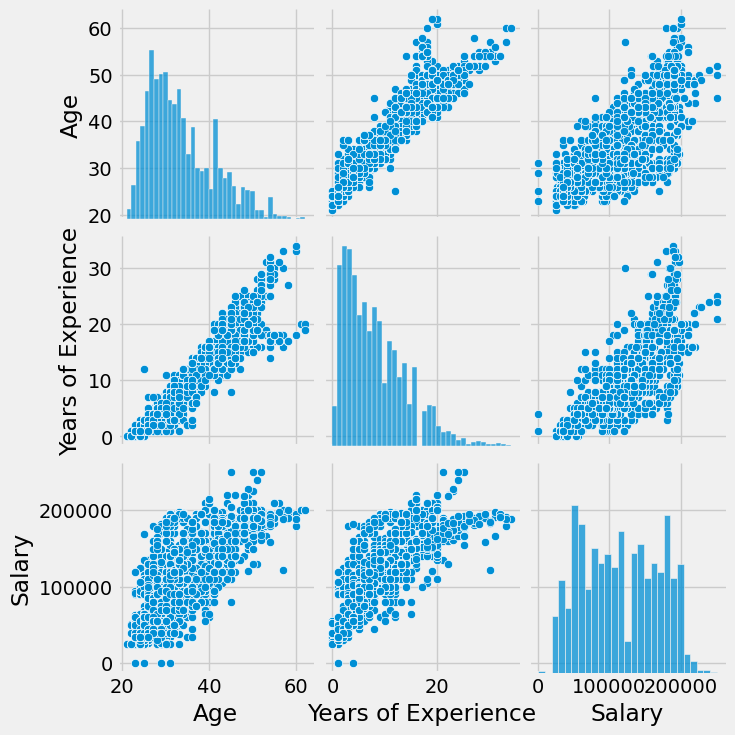

In [27]:
sns.pairplot(df)